<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/project/blob/main/soft%26hard_best_voting_and_Stacking_Ensemble_better2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sys
import timeit
import gc
import sklearn
import seaborn
from sklearn import metrics
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import optuna
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
import shap


In [3]:
# load the dataset
df = pd.read_csv('/content/diabetes (2).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#name of columns
print(df.columns)

#type of columns
print(df.dtypes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
# Descriptive statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


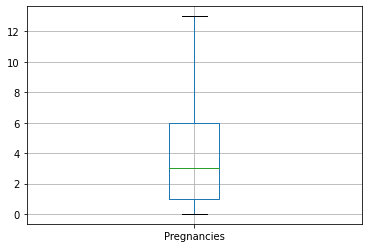

In [6]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['Pregnancies'].quantile(.25)
Q3 = df['Pregnancies'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Pregnancies'].between(q1, q3)]

boxplot = df.boxplot(column=['Pregnancies'])

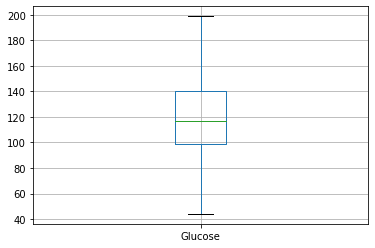

In [7]:
Q1 = df['Glucose'].quantile(.25)
Q3 = df['Glucose'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Glucose'].between(q1, q3)]

boxplot = df.boxplot(column=['Glucose'])

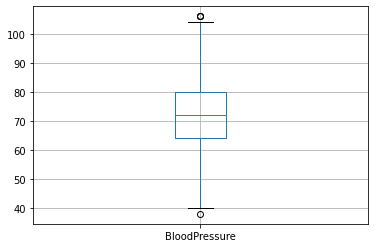

In [8]:
Q1 = df['BloodPressure'].quantile(.25)
Q3 = df['BloodPressure'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BloodPressure'].between(q1, q3)]

boxplot = df.boxplot(column=['BloodPressure'])

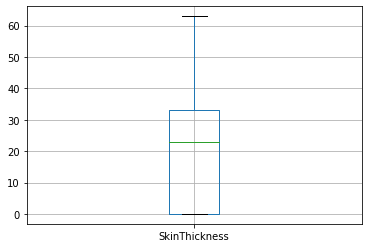

In [9]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['SkinThickness'].quantile(.25)
Q3 = df['SkinThickness'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['SkinThickness'].between(q1, q3)]

boxplot = df.boxplot(column=['SkinThickness'])

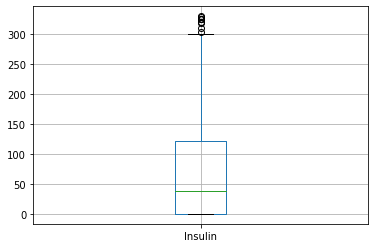

In [10]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['Insulin'].quantile(.25)
Q3 = df['Insulin'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Insulin'].between(q1, q3)]

boxplot = df.boxplot(column=['Insulin'])

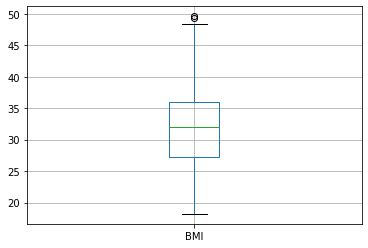

In [11]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['BMI'].quantile(.25)
Q3 = df['BMI'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BMI'].between(q1, q3)]

boxplot = df.boxplot(column=['BMI'])

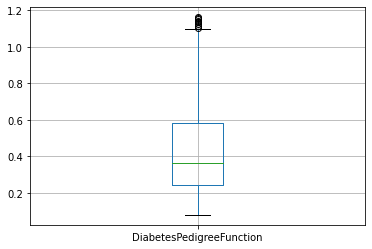

In [12]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['DiabetesPedigreeFunction'].quantile(.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['DiabetesPedigreeFunction'].between(q1, q3)]

boxplot = df.boxplot(column=['DiabetesPedigreeFunction'])

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.811437,119.208655,72.143740,20.471406,67.936631,31.928594,0.426577,33.165379,0.310665
std,3.246574,29.304287,11.306429,15.304202,83.324373,6.368231,0.244432,11.756778,0.463124
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.250000,0.240000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,38.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.900000,0.583000,40.500000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,81.000000,1.000000


In [14]:
dataset = df.copy(deep = True)
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               182
Insulin                     310
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
dataset = pd.DataFrame(imptr.fit_transform(dataset), columns = dataset.columns)


# showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


[IterativeImputer] Early stopping criterion not reached.


In [16]:
labels = dataset.columns.drop(['Outcome'])
X = dataset[labels]
y = dataset.Outcome
print(X.shape)

(647, 8)


In [17]:
dataset 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,159.25,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00,52.94,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,20.74,154.78,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,26.33,106.93,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
642,10.0,101.0,76.0,48.00,180.00,32.9,0.171,63.0,0.0
643,2.0,122.0,70.0,27.00,173.19,36.8,0.340,27.0,0.0
644,5.0,121.0,72.0,23.00,112.00,26.2,0.245,30.0,0.0
645,1.0,126.0,60.0,26.87,128.94,30.1,0.349,47.0,1.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,159.250000,33.600000,0.627000,50.000000,1.0
1,1.000000,85.000000,66.000000,29.000000,52.940000,26.600000,0.351000,31.000000,0.0
2,8.000000,183.000000,64.000000,20.740000,154.780000,23.300000,0.672000,32.000000,1.0
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.0
4,5.000000,116.000000,74.000000,26.330000,106.930000,25.600000,0.201000,30.000000,0.0
...,...,...,...,...,...,...,...,...,...
887,7.928369,182.820922,64.107447,20.619301,155.016742,23.414610,0.666431,32.017908,1.0
888,3.000000,167.594422,73.062948,18.765737,120.314741,30.298247,0.268000,30.297211,1.0
889,4.182656,104.182656,80.761625,33.158182,116.621248,38.559153,0.182439,26.492250,1.0
890,5.743053,117.312525,63.597261,37.489151,123.292452,33.777084,0.238576,39.486106,1.0


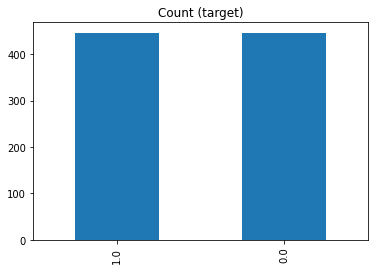

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1)#ratio='minority',n_jobs=-1
X, y = smote.fit_resample(dataset[labels], dataset['Outcome'])

dataset = pd.DataFrame(X, columns=labels)
dataset['Outcome'] = y

dataset['Outcome'].value_counts().plot(kind='bar', title='Count (target)');

dataset

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =sc.fit_transform(X)#only rearangeng x

print(X)
print(X.shape)

[[ 0.60620502  0.74332729 -0.08423773 ...  0.15709378  0.78119198
   1.33460389]
 [-0.96932515 -1.31582688 -0.63125312 ... -0.9894566  -0.39268085
  -0.2974651 ]
 [ 1.23641708  1.88730183 -0.81359158 ... -1.52997321  0.97258428
  -0.21156673]
 ...
 [ 0.03354902 -0.68884201  0.71455289 ...  0.96936794 -1.10959617
  -0.68467347]
 [ 0.52523941 -0.25969244 -0.85030903 ...  0.18609891 -0.87083702
   0.43147752]
 [ 0.68385084 -0.65454231  0.23289174 ... -0.20677701  1.60969422
   0.60385131]]
(892, 8)


In [20]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA()
X= pca.fit_transform(X)
print(X)

[[ 1.43437318  0.5225937   0.11213811 ...  0.42380996 -0.69885397
  -0.03822879]
 [-2.2198368  -0.21979438  0.74976467 ...  0.62509845 -0.51843144
   0.40206364]
 [-0.06231975  1.55842437 -1.6490507  ... -1.42111094 -0.71576288
   0.10225158]
 ...
 [-0.01947253 -0.74575641  1.05422536 ... -0.34421235  0.47691574
  -0.24672394]
 [ 0.07394204  0.04965913  0.81118451 ...  0.41593935 -0.30999063
   0.11381512]
 [ 0.10324342  0.71012296  0.271708   ...  0.02294001  0.69130404
  -0.22948793]]


In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X =mms.fit_transform(X)#only rearangeng x

print(X)
print(X.shape)

[[0.66430164 0.54953972 0.48959143 ... 0.47890436 0.34220632 0.47294754]
 [0.23668954 0.45545209 0.59246372 ... 0.51675435 0.37709955 0.6049159 ]
 [0.48916009 0.68081722 0.2054478  ... 0.13198821 0.33893618 0.51505356]
 ...
 [0.49417403 0.38879353 0.64158427 ... 0.3344866  0.56959704 0.41045551]
 [0.50510531 0.48960167 0.60237297 ... 0.47742439 0.41741145 0.51851949]
 [0.50853413 0.57330651 0.51533584 ... 0.40352538 0.61105917 0.41562164]]
(892, 8)


In [22]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from numpy import hstack
from numpy import vstack
from numpy import asarray
def get_voting():
 # define the base models
 models = list()
 models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
 models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini',min_samples_split=0.1, min_samples_leaf=1, splitter='best')))
 models.append(('SVC', SVC(gamma='scale', probability=True)))
 models.append(('GaussianNB', GaussianNB()))
 models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=27, leaf_size=20,algorithm='brute',metric='manhattan' , p=1)))
 models.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=200,learning_rate=0.1)))
 models.append(('BaggingClassifier', BaggingClassifier(n_estimators=100)))
 models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto')))
 models.append(('XGBClassifie', XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256)))
 models.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100)))
 models.append(('CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)))

 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='hard')
 return ensemble


# create a list of base-models
def get_models():
 models = dict()
 models['LogisticRegression']=(LogisticRegression(solver='liblinear'))
 models['DecisionTreeClassifier']=(DecisionTreeClassifier(criterion='gini',min_samples_split=0.1, min_samples_leaf=1, splitter='best'))
 models['SVC']=(SVC(gamma='scale', probability=True))
 models['GaussianNB']=(GaussianNB())
 models['KNeighborsClassifier']=(KNeighborsClassifier(n_neighbors=27, leaf_size=20,algorithm='brute',metric='manhattan' , p=1))
 models['AdaBoostClassifier']=(AdaBoostClassifier(n_estimators=200,learning_rate=0.1))
 models['BaggingClassifier']=(BaggingClassifier(n_estimators=100))
 models['RandomForestClassifier']=(RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto'))
 models['XGBClassifie']=(XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256))
 models['ExtraTreesClassifier']=(ExtraTreesClassifier(n_estimators=100))
 models['CatBoostClassifier']=(CatBoostClassifier(verbose=0, n_estimators=100))
 models['hard_voting'] = get_voting()
 return models


# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=8, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

>LogisticRegression 0.751 (0.043)
>DecisionTreeClassifier 0.740 (0.047)
>SVC 0.829 (0.035)
>GaussianNB 0.769 (0.041)
>KNeighborsClassifier 0.774 (0.041)
>AdaBoostClassifier 0.793 (0.040)
>BaggingClassifier 0.847 (0.035)
>RandomForestClassifier 0.833 (0.037)
>XGBClassifie 0.832 (0.039)
>ExtraTreesClassifier 0.863 (0.033)
>CatBoostClassifier 0.829 (0.037)
>hard_voting 0.836 (0.038)


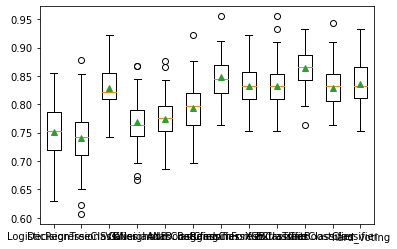

In [26]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LogisticRegression 0.751 (0.043)
>DecisionTreeClassifier 0.740 (0.047)
>SVC 0.829 (0.035)
>GaussianNB 0.769 (0.041)
>KNeighborsClassifier 0.774 (0.041)
>AdaBoostClassifier 0.793 (0.040)
>BaggingClassifier 0.849 (0.036)
>RandomForestClassifier 0.827 (0.038)
>XGBClassifie 0.832 (0.039)
>ExtraTreesClassifier 0.860 (0.034)
>CatBoostClassifier 0.829 (0.037)
>soft_voting 0.840 (0.038)


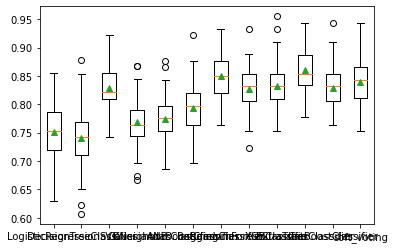

In [28]:
def get_soft_voting():
 # define the base models
 models = list()
 models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
 models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini',min_samples_split=0.1, min_samples_leaf=1, splitter='best')))
 models.append(('SVC', SVC(gamma='scale', probability=True)))
 models.append(('GaussianNB', GaussianNB()))
 models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=27, leaf_size=20,algorithm='brute',metric='manhattan' , p=1)))
 models.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=200,learning_rate=0.1)))
 models.append(('BaggingClassifier', BaggingClassifier(n_estimators=100)))
 models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto')))
 models.append(('XGBClassifie', XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256)))
 models.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100)))
 models.append(('CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)))

 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble


 # create a list of base-models
def get_soft_models():
 models = dict()
 models['LogisticRegression']=(LogisticRegression(solver='liblinear'))
 models['DecisionTreeClassifier']=(DecisionTreeClassifier(criterion='gini',min_samples_split=0.1, min_samples_leaf=1, splitter='best'))
 models['SVC']=(SVC(gamma='scale', probability=True))
 models['GaussianNB']=(GaussianNB())
 models['KNeighborsClassifier']=(KNeighborsClassifier(n_neighbors=27, leaf_size=20,algorithm='brute',metric='manhattan' , p=1))
 models['AdaBoostClassifier']=(AdaBoostClassifier(n_estimators=200,learning_rate=0.1))
 models['BaggingClassifier']=(BaggingClassifier(n_estimators=100))
 models['RandomForestClassifier']=(RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto'))
 models['XGBClassifie']=(XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256))
 models['ExtraTreesClassifier']=(ExtraTreesClassifier(n_estimators=100))
 models['CatBoostClassifier']=(CatBoostClassifier(verbose=0, n_estimators=100))
 models['soft_voting'] = get_soft_voting()
 return models

 # get the models to evaluate
models = get_soft_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>SVC 0.829 (0.035)
>BaggingClassifier 0.848 (0.036)
>RandomForestClassifier 0.829 (0.040)
>XGBClassifie 0.832 (0.039)
>ExtraTreesClassifier 0.865 (0.033)
>CatBoostClassifier 0.829 (0.037)
>soft_voting 0.852 (0.037)


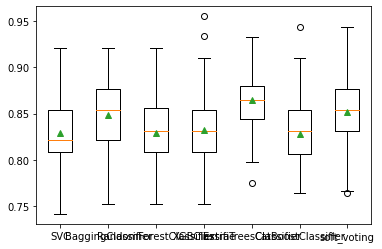

In [29]:
def get2_soft_voting():
 # define the base models
 models = list()
 models.append(('SVC', SVC(gamma='scale', probability=True)))
 models.append(('BaggingClassifier', BaggingClassifier(n_estimators=100)))
 models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto')))
 models.append(('XGBClassifie', XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256)))
 models.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100)))
 models.append(('CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)))

 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble


 # create a list of base-models
def get2_soft_models():
 models = dict()
 models['SVC']=(SVC(gamma='scale', probability=True))
 models['BaggingClassifier']=(BaggingClassifier(n_estimators=100))
 models['RandomForestClassifier']=(RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto'))
 models['XGBClassifie']=(XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256))
 models['ExtraTreesClassifier']=(ExtraTreesClassifier(n_estimators=100))
 models['CatBoostClassifier']=(CatBoostClassifier(verbose=0, n_estimators=100))
 models['soft_voting'] = get2_soft_voting()
 return models

 # get the models to evaluate
models = get2_soft_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>BaggingClassifier 0.848 (0.036)
>XGBClassifie 0.832 (0.039)
>ExtraTreesClassifier 0.862 (0.036)
>soft_voting 0.858 (0.035)


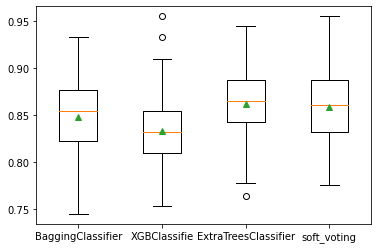

In [30]:
def get3_soft_voting():
 # define the base models
 models = list()
 models.append(('BaggingClassifier', BaggingClassifier(n_estimators=100)))
 models.append(('XGBClassifie', XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256)))
 models.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100)))

 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble


 # create a list of base-models
def get3_soft_models():
 models = dict()
 models['BaggingClassifier']=(BaggingClassifier(n_estimators=100))
 models['XGBClassifie']=(XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256))
 models['ExtraTreesClassifier']=(ExtraTreesClassifier(n_estimators=100))
 models['soft_voting'] = get3_soft_voting()
 return models

 # get the models to evaluate
models = get3_soft_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [23]:
#Stacking Ensemble
from sklearn.ensemble import StackingClassifier
def get_mod():
 # define the base models
 models = list()
 models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
 models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini',min_samples_split=0.1, min_samples_leaf=1, splitter='best')))
 models.append(('SVC', SVC(gamma='scale', probability=True)))
 models.append(('GaussianNB', GaussianNB()))
 models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=27, leaf_size=20,algorithm='brute',metric='manhattan' , p=1)))
 models.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=200,learning_rate=0.1)))
 models.append(('BaggingClassifier', BaggingClassifier(n_estimators=100)))
 models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100,criterion='gini' ,max_depth=8 , max_features='auto')))
 models.append(('XGBClassifie', XGBClassifier(min_child_weight=5, gamma=1.5, subsample=1.0, colsample_bytree=0.6, colsample_bylevel=1, colsample_bynode=1, max_depth=8 , n_estimators=180 , n_jobs=4, nthread=4, learning_rate=0.1, max_bin=256)))
 models.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100)))
 models.append(('CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)))
 return(models)

 
model = StackingClassifier(get_mod(), final_estimator=LogisticRegression(), cv=3)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=8, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.869 (0.049)


In [25]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(model, 'StackingClassifier_saved_model.h5')
print('saved')

saved
